<a href="https://colab.research.google.com/github/samndambuki/4th-year-Project/blob/master/Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries
import numpy as np 
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

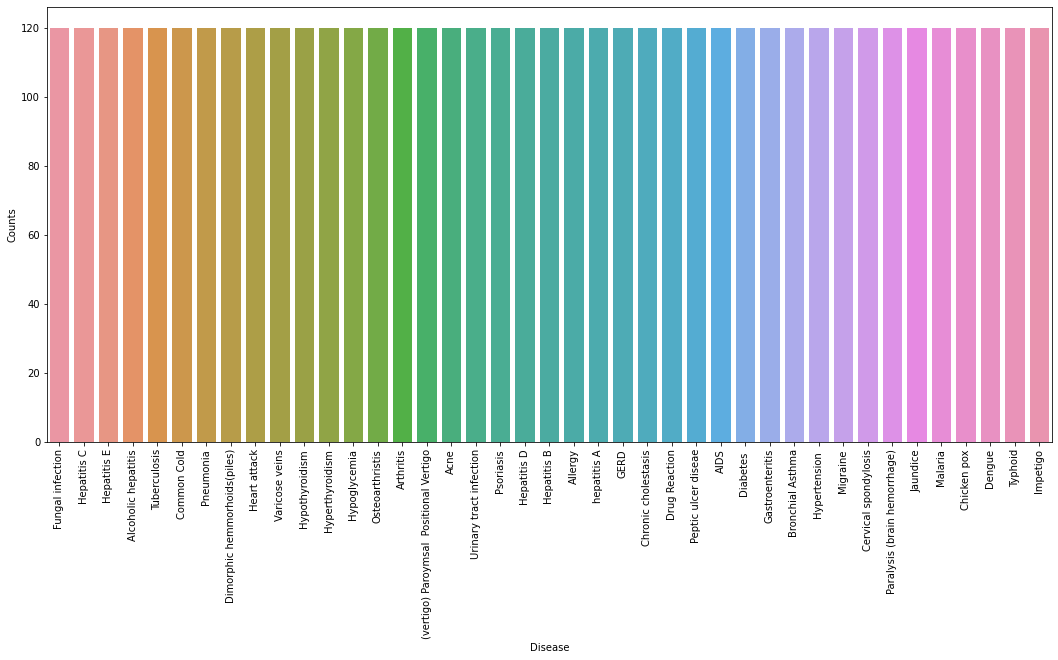

In [3]:
#Read train.csv
DATA_PATH = "/content/drive/MyDrive/Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis =1 )

#Checking whether dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease" : disease_counts.index,
    "Counts" : disease_counts.values
    })

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [4]:
#LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [5]:
#Training and Testing
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 24)

print(f"Train:{X_train.shape}, {y_train.shape}")
print(f"Test:{X_test.shape},{y_test.shape}")

Train:(3936, 132), (3936,)
Test:(984, 132),(984,)


In [7]:
#K-fold cross validation 
#Defining scoring metric 
def cv_scoring(estimator, X, y ):
  return accuracy_score(y, estimator.predict(X))

  #Initializing Models
models = {
      "SVC" : SVC(),
      "Gaussian NB" : GaussianNB(),
      "Random Forest" : RandomForestClassifier(random_state=18)
}

#Producing cross validation score for the models
for model_name in models:
  model = models[model_name]
  scores = cross_val_score(model, X, y, cv=10,
                             n_jobs = -1,
                             scoring = cv_scoring)
  print("=="*30)
  print(model_name)
  print(f"Scores: {scores}")
  print(f"Mean Score: {np.mean(scores)}")
    
    



SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier:100.0
Accuracy on test data by SVM Classifier:100.0


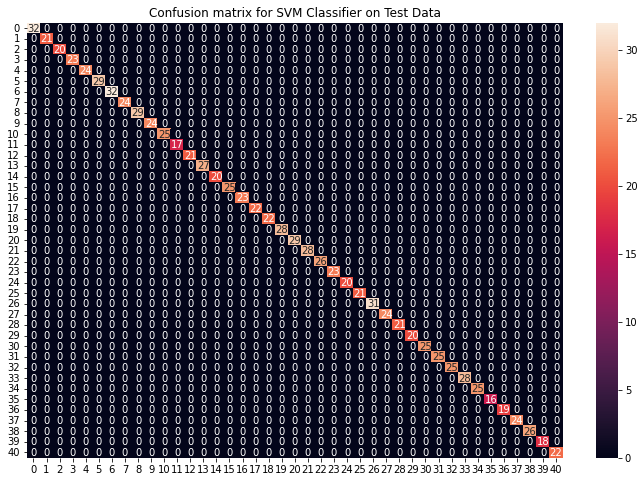

ccuracy on train data by Naive Bayes Classifier:100.0
Accuracy on test data by Naive Bayes Classifier:100.0


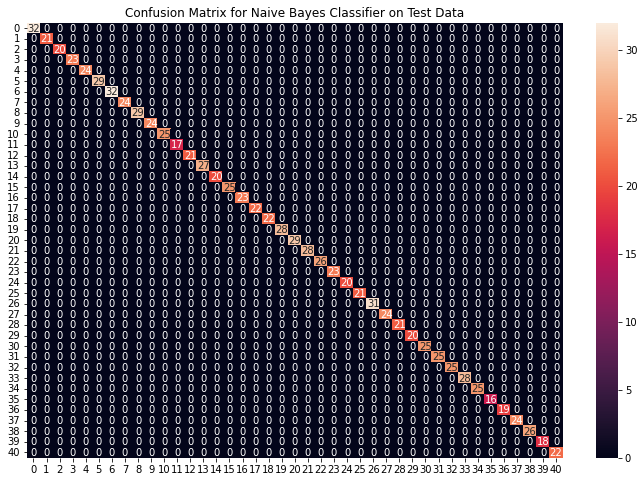

Accuracy on train data by Random Forest Classifier:100.0
Accuracy on  test data by Random Forest Classifier:100.0


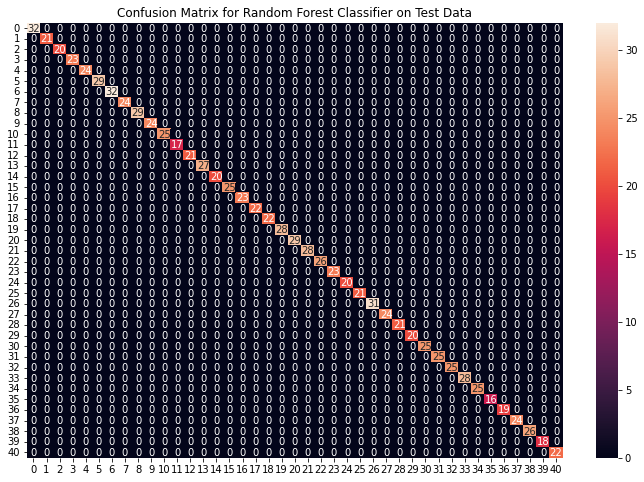

In [10]:
#Robust Classifier by Combining all models
#Training and Testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train,y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
:{accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
:{accuracy_score(y_test,preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion matrix for SVM Classifier on Test Data")
plt.show()

#Training and Testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"ccuracy on train data by Naive Bayes Classifier\
:{accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
:{accuracy_score(y_test,preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

#Training and Testing Random Forest Classifier
rf_model =RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
:{accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on  test data by Random Forest Classifier\
:{accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()